In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
import time
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
catmednan = np.load('/content/drive/MyDrive/Students/catCirrMedNan.npy')

In [ ]:
mednan = np.load('/content/drive/MyDrive/Students/cirrhosis_medNaN.npy')

In [ ]:
model = keras.Sequential([
        layers.Dense(100, activation="relu", 
                     kernel_regularizer=keras.regularizers.L2(.01)),
        layers.Dense(4,activation= 'softmax',
                     kernel_regularizer=keras.regularizers.L2(.01))])
model.compile(
    loss=keras.losses.CategoricalCrossentropy(),
    optimizer=tf.keras.optimizers.Adam(learning_rate=2e-3),
    metrics=[ 'accuracy'])
history = model.fit(catmednan[:,:-4],catmednan[:,-4:],epochs=50)

Epoch 1/50
13/13 [==============================] - 1s 2ms/step - loss: 497.0050 - categorical_accuracy: 0.2816 - accuracy: 0.2816
Epoch 2/50
13/13 [==============================] - 0s 2ms/step - loss: 189.8485 - categorical_accuracy: 0.3034 - accuracy: 0.3034
Epoch 3/50
13/13 [==============================] - 0s 2ms/step - loss: 87.6089 - categorical_accuracy: 0.3835 - accuracy: 0.3835
Epoch 4/50
13/13 [==============================] - 0s 2ms/step - loss: 49.3697 - categorical_accuracy: 0.3981 - accuracy: 0.3981
Epoch 5/50
13/13 [==============================] - 0s 2ms/step - loss: 35.1412 - categorical_accuracy: 0.3519 - accuracy: 0.3519
Epoch 6/50
13/13 [==============================] - 0s 2ms/step - loss: 34.4972 - categorical_accuracy: 0.3811 - accuracy: 0.3811
Epoch 7/50
13/13 [==============================] - 0s 3ms/step - loss: 47.8676 - categorical_accuracy: 0.3617 - accuracy: 0.3617
Epoch 8/50
13/13 [==============================] - 0s 2ms/step - loss: 50.3855 - catego

## testing metrics

In [ ]:
pred = model.predict(mednan[:,:-1])

In [ ]:
intpred = np.argmax(pred,axis=1)+1


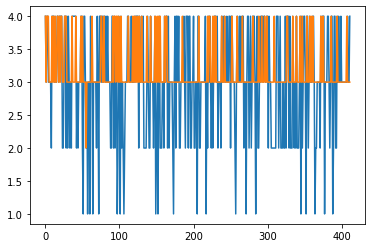

In [ ]:
plt.plot( mednan[:,-1])
plt.plot( intpred)
rmse = np.sqrt(np.mean(np.square(mednan[:,-1]-intpred)))

In [ ]:
for key in history.history:
  print(key,history.history[key][-3:])
print('rmse',rmse)

loss [49.008846282958984, 64.63551330566406, 36.06263732910156]
categorical_accuracy [0.3446601927280426, 0.3689320385456085, 0.41019418835639954]
accuracy [0.3446601927280426, 0.3689320385456085, 0.41019418835639954]
rmse 0.8604018027270296


In [ ]:
curvepred = pred @ np.array([[1],[2],[3],[4]])

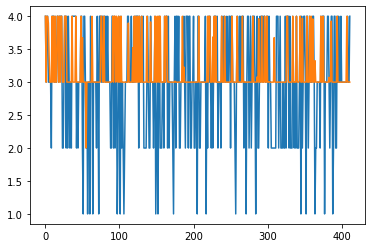

In [ ]:
plt.plot( mednan[:,-1])
plt.plot( curvepred)
curvermse = np.sqrt(np.mean(np.square(mednan[:,-1]-curvepred)))

In [ ]:
curvermse

0.9781221242871795

(array([ 21.,   0.,   0.,  92.,   0.,   0., 155.,   0.,   0., 144.]),
 array([1. , 1.3, 1.6, 1.9, 2.2, 2.5, 2.8, 3.1, 3.4, 3.7, 4. ]),
 <a list of 10 Patch objects>)

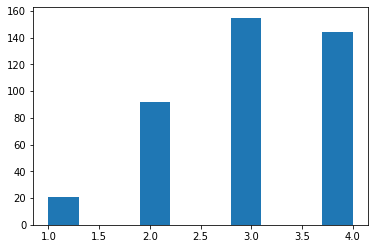

In [ ]:
plt.hist(mednan[:,-1])

(array([ 5.,  0.,  0., 19.,  0.,  0., 33.,  0.,  0., 30.]),
 array([1. , 1.3, 1.6, 1.9, 2.2, 2.5, 2.8, 3.1, 3.4, 3.7, 4. ]),
 <a list of 10 Patch objects>)

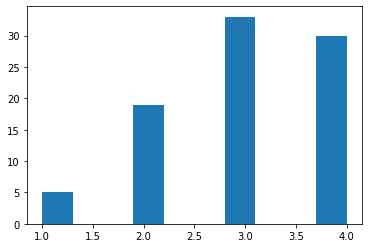

In [ ]:
plt.hist(mednan[325:,-1])

In [ ]:
def tstr():
    '''
    provides a string of current time in PST
    for time sensitive file names with no colons or spaces
    '''
    out = ''
    for i in time.ctime():
        if i!=' ' and i!=':':
            out+=i
        else:
            out+='_'
    return out

In [ ]:
EPOCHS = 50
L2REG = 1e-2
LR = 1e-3
SAVE = False
LABEL = ('100_LR:'+str(LR)+'_REG:'+str(L2REG)+
         '_EPOCH:'+str(EPOCHS))
model = keras.Sequential([
        layers.Dense(100, activation="relu", 
                kernel_regularizer=keras.regularizers.L2(L2REG )),
        layers.Dense(4,activation= 'softmax',
                kernel_regularizer=keras.regularizers.L2(L2REG ))])
model.compile(
    loss=keras.losses.CategoricalCrossentropy(),
    optimizer=tf.keras.optimizers.Adam(learning_rate=LR),
    metrics=[ 'accuracy'])
hist = model.fit(catmednan[:325,:-4],catmednan[:325,-4:],
                 epochs=EPOCHS,
                 validation_data=(catmednan[325:,:-4],
                                  catmednan[325:,-4:]))

Epoch 1/50
11/11 [==============================] - 1s 25ms/step - loss: 266.5125 - accuracy: 0.3692 - val_loss: 137.9086 - val_accuracy: 0.4253
Epoch 2/50
11/11 [==============================] - 0s 5ms/step - loss: 128.9035 - accuracy: 0.3354 - val_loss: 63.5844 - val_accuracy: 0.2299
Epoch 3/50
11/11 [==============================] - 0s 8ms/step - loss: 69.4628 - accuracy: 0.3815 - val_loss: 29.5783 - val_accuracy: 0.4598
Epoch 4/50
11/11 [==============================] - 0s 5ms/step - loss: 49.3145 - accuracy: 0.3354 - val_loss: 25.4638 - val_accuracy: 0.4828
Epoch 5/50
11/11 [==============================] - 0s 7ms/step - loss: 45.8937 - accuracy: 0.4246 - val_loss: 16.4934 - val_accuracy: 0.4713
Epoch 6/50
11/11 [==============================] - 0s 5ms/step - loss: 28.6278 - accuracy: 0.3938 - val_loss: 24.8117 - val_accuracy: 0.3793
Epoch 7/50
11/11 [==============================] - 0s 5ms/step - loss: 24.4910 - accuracy: 0.3477 - val_loss: 13.8974 - val_accuracy: 0.4368
Ep

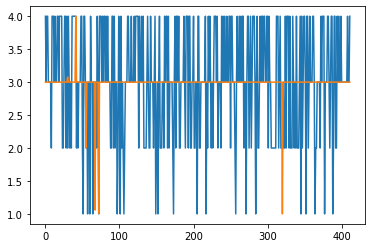

In [ ]:
pred= model.predict(catmednan[:,:-4])
curvepred = pred @ np.array([[1],[2],[3],[4]])
plt.plot( mednan[:,-1])
plt.plot( curvepred)
curvermse = np.sqrt(np.mean(np.square(mednan[:,-1]-curvepred)))

In [ ]:
hist.history['rmse']=[curvermse]*EPOCHS

In [ ]:
df = pd.DataFrame(hist.history)

In [ ]:
tstr()[4:-8]


'Jul_19_04_06'

In [ ]:
rmses = {}

EPOCHS = 30
L2REG = 1e-2
LR = 1e-3
SAVE = False
for L2REG in [1e-2, 3e-2,1e-1]:
  for LR in [3e-4,1e-3,3e-3]:
    LABEL = ('100_LR:'+str(LR)+'_REG:'+str(L2REG)+
            '_EPOCH:'+str(EPOCHS))
    
    print(
      '\n\n\n\nRunning '+LABEL+' experiment'
    )
    model = keras.Sequential([
            layers.Dense(100, activation="relu", 
                    kernel_regularizer=keras.regularizers.L2(L2REG )),
            layers.Dense(4,activation= 'softmax',
                    kernel_regularizer=keras.regularizers.L2(L2REG ))])
    model.compile(
        loss=keras.losses.CategoricalCrossentropy(),
        optimizer=tf.keras.optimizers.Adam(learning_rate=LR),
        metrics=[ 'accuracy'])
    hist = model.fit(catmednan[:325,:-4],catmednan[:325,-4:],
                    epochs=EPOCHS,
                    validation_data=(catmednan[325:,:-4],
                                      catmednan[325:,-4:]))
    

    pred= model.predict(catmednan[:,:-4])
    curvepred = pred @ np.array([[1],[2],[3],[4]])
    curvermse = np.sqrt(np.mean(np.square(mednan[:,-1]-curvepred)))

    rmses[LABEL] = curvermse

rmseDF = pd.DataFrame(rmses, index=['rmse'])
rmseDF.to_csv('/content/drive/MyDrive/Students/DavidTests'+tstr()[4:-8]+'.csv')





Running 100_LR:0.0003_REG:0.01_EPOCH:30 experiment
Epoch 1/30
11/11 [==============================] - 1s 20ms/step - loss: 1105.0133 - accuracy: 0.3723 - val_loss: 895.6395 - val_accuracy: 0.4023
Epoch 2/30
11/11 [==============================] - 0s 5ms/step - loss: 750.1364 - accuracy: 0.3908 - val_loss: 533.3167 - val_accuracy: 0.4253
Epoch 3/30
11/11 [==============================] - 0s 4ms/step - loss: 401.6268 - accuracy: 0.3692 - val_loss: 179.1266 - val_accuracy: 0.4023
Epoch 4/30
11/11 [==============================] - 0s 6ms/step - loss: 132.4520 - accuracy: 0.4615 - val_loss: 135.9396 - val_accuracy: 0.4368
Epoch 5/30
11/11 [==============================] - 0s 6ms/step - loss: 123.4961 - accuracy: 0.4246 - val_loss: 81.8475 - val_accuracy: 0.4253
Epoch 6/30
11/11 [==============================] - 0s 6ms/step - loss: 86.7309 - accuracy: 0.4462 - val_loss: 50.9213 - val_accuracy: 0.4598
Epoch 7/30
11/11 [==============================] - 0s 7ms/step - loss: 69.1069 - 